## Topic Model Letter Chunk Prep

## Resources

In [9]:
# Packages
import pandas as pd
import gensim
import numpy as np
from gensim.utils import simple_preprocess
import spacy
import pickle
from collections import Counter
from matplotlib import pyplot as plt

In [10]:
# Functions for stopwords, bigrams, trigrams, lemmatization, conversion of texts into list of lowercase tokens

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'VERB']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

def text_to_words(texts):
    for text in texts:
        yield(gensim.utils.simple_preprocess(str(text), 
                                             deacc=True, # removes accents
                                             min_len=3))   # removes tokens shorter than three characters

In [11]:
# Initialize spacy 'en' model
# python3 -m spacy download en_core_web_md
nlp = spacy.load('en_core_web_md')

In [27]:
# 19th century stopwords
stop_words = pd.read_csv("Jockers_19thCenturyStops.csv")
stop_words = stop_words['word'].values.astype(str).tolist()
len(stop_words)

5631

In [13]:
# Narratives
df = pd.read_csv("20240405_PhD_Data4TopicModel-LetterChunk.csv") 
df = df.rename(columns={'Unnamed: 0':'docID-AT'}) # Change column name to "docID-AT"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2270 entries, 0 to 2269
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   docID-AT          2270 non-null   int64  
 1   docauthorid       2270 non-null   object 
 2   docauthorname     2270 non-null   object 
 3   docid             2270 non-null   object 
 4   docyear           2235 non-null   float64
 5   docmonth          2171 non-null   float64
 6   authorgender      2270 non-null   object 
 7   agewriting        1536 non-null   float64
 8   agedeath          1525 non-null   float64
 9   relMin            1870 non-null   object 
 10  nationalOrigin    2266 non-null   object 
 11  authorLocation    2270 non-null   object 
 12  U                 2076 non-null   object 
 13  M                 2076 non-null   object 
 14  S                 2076 non-null   object 
 15  F                 2076 non-null   object 
 16  L                 2076 non-null   object 


Code below adapated from https://medium.com/analytics-vidhya/topic-modeling-using-gensim-lda-in-python-48eaa2344920

## Prepare narratives

In [14]:
# Convert values in text to list of strings (objects)
data = df.text.values.tolist()

In [15]:
data_words = list(text_to_words(data))

In [17]:
#data_words[0]

## Bigram (and trigram) models

In [38]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=37)
#trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
#trigram_mod = gensim.models.phrases.Phraser(trigram)

In [20]:
# See results of trigrams function

#trigrams1 = [] # Create list
#for item in data_words: # For each item (i.e., chunk) in data words
    #trigrams1.append([b for b in trigram[item] if b.count('_') == 1]) # add 2-grams to new list
#trigrams1 = list(np.concatenate(trigrams1)) # flatten list
#trigrams1 = list(dict.fromkeys(trigrams1)) # take unique values
#print(sorted(trigrams1)) # print in alphabetical order

#trigrams2 = [] # Create list
#for item in data_words: # For each item (i.e., chunk) in data words
    #trigrams2.append([b for b in trigram[item] if b.count('_') == 2]) # add 2-grams to new list
#trigrams2 = list(np.concatenate(trigrams2)) # flatten list
#trigrams2 = list(dict.fromkeys(trigrams2)) # take unique values
#print(sorted(trigrams2)) # print in alphabetical order

## Stop Words

In [21]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

In [22]:
# What are the most common words?
counts = Counter(x for sublist in data_words_nostops for x in sublist)
Counter(counts).most_common(1000)

[('dear', 1262),
 ('sister', 1085),
 ('time', 965),
 ('little', 915),
 ('day', 909),
 ('country', 844),
 ('work', 768),
 ('place', 711),
 ('old', 675),
 ('land', 641),
 ('came', 636),
 ('give', 621),
 ('years', 613),
 ('men', 585),
 ('house', 563),
 ('people', 557),
 ('take', 532),
 ('letter', 510),
 ('money', 498),
 ('children', 497),
 ('poor', 495),
 ('critchlow', 457),
 ('dollars', 454),
 ('year', 451),
 ('kind', 439),
 ('find', 431),
 ('week', 430),
 ('school', 420),
 ('life', 413),
 ('going', 398),
 ('father', 396),
 ('god', 395),
 ('family', 388),
 ('feel', 368),
 ('days', 367),
 ('canada', 367),
 ('mother', 363),
 ('send', 363),
 ('wish', 362),
 ('sent', 359),
 ('saw', 359),
 ('quite', 359),
 ('states', 328),
 ('took', 325),
 ('sisters', 324),
 ('write', 320),
 ('hear', 319),
 ('half', 319),
 ('room', 317),
 ('large', 317),
 ('having', 310),
 ('friends', 307),
 ('fine', 303),
 ('present', 300),
 ('town', 297),
 ('pay', 290),
 ('england', 290),
 ('seen', 283),
 ('things', 280),
 

In [23]:
len(Counter(counts))

16298

In [28]:
new_items = ['critchlow', 
             'moodie', 
             'albuquerque', 
             'ellin', 
             'belleville', 
             'toronto', 
             'montreal', 
             'bentley', 
             'york', 
             'london', 
             'quebec',
             'hamilton', 
             'carrothers', 
             'dunbar', 
             'blandina', 
             'cincinnati', 
             'california', 
             'gasparri', 
             'washington',
             'sister',
             'sisters',
             'mother',
             'father',
             'brother',
             'brothers',
             'canada',
             'states', # in this corpus, refers to United States
             'england',
             'ireland',
             'mexico',
             'scotland',
             'january',
             'february',
             'march',
             'april',
             'may',
             'june',
             'july',
             'august',
             'september',
             'october',
             'november',
             'december',
             'boston',
             'europe',
             'monday',
             'tuesday',
             'wednesday',
             'thursday',
             'friday',
             'saturday',
             'sunday',
             'dear', # In this corpus, dear, regard, regards are conventional opening and closing language
             'regard',
             'regards',
             'parr',
             'traill',
             'haszard', 
             'united',
             'davies',
             'lamy',
             'forsyth',
             'chavez',
             'liverpool', 
             'albany'
            ]

In [29]:
stop_words.extend(new_items)
len(stop_words)

5696

In [30]:
x = ['winter', 'spring', 'summer', 'autumn']
stop_words = [s for s in stop_words if s not in x]
len(stop_words)

5692

In [31]:
# Put in alphabetical order
stop_words.sort() 

In [32]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# What are the most common words?
counts = Counter(x for sublist in data_words_nostops for x in sublist)
Counter(counts).most_common(1000)

[('time', 965),
 ('little', 915),
 ('day', 909),
 ('country', 844),
 ('work', 768),
 ('place', 711),
 ('old', 675),
 ('land', 641),
 ('came', 636),
 ('give', 621),
 ('years', 613),
 ('men', 585),
 ('house', 563),
 ('people', 557),
 ('take', 532),
 ('letter', 510),
 ('money', 498),
 ('children', 497),
 ('poor', 495),
 ('dollars', 454),
 ('year', 451),
 ('kind', 439),
 ('find', 431),
 ('week', 430),
 ('school', 420),
 ('life', 413),
 ('going', 398),
 ('god', 395),
 ('family', 388),
 ('feel', 368),
 ('days', 367),
 ('send', 363),
 ('wish', 362),
 ('sent', 359),
 ('saw', 359),
 ('quite', 359),
 ('took', 325),
 ('write', 320),
 ('hear', 319),
 ('half', 319),
 ('room', 317),
 ('large', 317),
 ('having', 310),
 ('friends', 307),
 ('fine', 303),
 ('present', 300),
 ('town', 297),
 ('pay', 290),
 ('seen', 283),
 ('things', 280),
 ('bring', 275),
 ('mind', 274),
 ('want', 274),
 ('farm', 272),
 ('small', 271),
 ('winter', 269),
 ('away', 265),
 ('heard', 263),
 ('called', 263),
 ('world', 263),


In [33]:
# Count words
len(Counter(counts))

16244

## Bigrams & Lemmatization

In [39]:
# See results of bigrams function
bigrams = [] # Create list
for item in data_words_nostops: # For each item (i.e., letter) in data words
    bigrams.append([b for b in bigram[item] if b.count('_') == 1]) # add 2-grams to new list
bigrams = list(np.concatenate(bigrams)) # flatten list
bigrams = list(dict.fromkeys(bigrams)) # take unique values
print(sorted(bigrams)) # print in alphabetical order

['indian_corn', 'years_ago']


In [40]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Form Trigrams
# data_words_trigrams = make_trigrams(data_words_nostops)

In [41]:
# Do lemmatization keeping only nouns
data_lemmatizedNouns = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])
#print(data_lemmatizedNouns[:1])

In [44]:
counts = Counter(x for sublist in data_lemmatizedNouns for x in sublist)
len(Counter(counts))

6778

In [42]:
# Do lemmatization keeping only verbs
data_lemmatizedVerbs = lemmatization(data_words_bigrams, allowed_postags=['VERB'])
#print(data_lemmatizedVerbs[:1])

In [45]:
counts = Counter(x for sublist in data_lemmatizedVerbs for x in sublist)
len(Counter(counts))

2991

In [43]:
# Do lemmatization keeping only noun, verb
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'VERB'])
#print(data_lemmatized[:1])

In [46]:
counts = Counter(x for sublist in data_lemmatized for x in sublist)
len(Counter(counts))

8116

## Evaluation

In [47]:
lengths = []

for x in data_lemmatized:
    lengths.append(len(x))

print(max(lengths))
print(min(lengths))
print(sum(lengths)/len(lengths))

102
14
59.14140969162995


In [48]:
# Let's have a look at the shortest text
# What one is it?
min(range(len(lengths)), key=lengths.__getitem__)

1372

In [49]:
print(df['text'][1372])

Margaret Ellin to Margaret Chalmer October 26 We were all very much pleased with your likeness and Mama says she does not think you are changed at all since we left. I hope we shall get our things today from the Theresa which you have been so kind to send. There has been a man here exhibiting his daughter who is only 17 and seven feet ten inches high and they call her "The Giantess." Great numbers went to see her but none of us did.


In [50]:
print(data_words_nostops[1372])

['chalmer', 'pleased', 'likeness', 'mama', 'says', 'changed', 'things', 'today', 'kind', 'send', 'exhibiting', 'daughter', 'feet', 'inches', 'high', 'call', 'giantess']


In [51]:
print(data_words_bigrams[1372])

['chalmer', 'pleased', 'likeness', 'mama', 'says', 'changed', 'things', 'today', 'kind', 'send', 'exhibiting', 'daughter', 'feet', 'inches', 'high', 'call', 'giantess']


In [52]:
print(data_lemmatized[1372])

['chalmer', 'please', 'likeness', 'say', 'change', 'thing', 'today', 'send', 'exhibit', 'daughter', 'foot', 'inch', 'call', 'giantess']


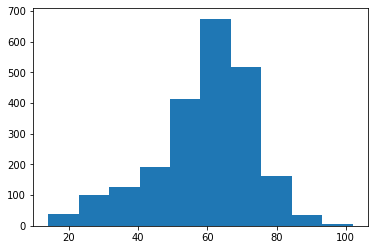

In [53]:
plt.hist(lengths, 10)
plt.show()

In [54]:
lengths = []

for x in data_lemmatizedNouns:
    lengths.append(len(x))

print(max(lengths))
print(min(lengths))
print(sum(lengths)/len(lengths))

83
6
39.3136563876652


In [55]:
# Let's have a look at the shortest text
# What one is it?
min(range(len(lengths)), key=lengths.__getitem__)

1459

In [56]:
print(df['text'][1459])

in general than the are in Ireland gorge trimble and wife and sister have arrived here and are well; I hear Thomas Stuard has come to goddrige and that he left the wife behind him you will be pleased when you write to mention some pirtucalars conserning it; give my bests respects to Bessey and the Children and I remain your ever affecned brother Nathaniel Carrothers When you write direct your letter to London Canada West. [To] Mr William Carrothers / of Farnugh / near Lisbelaw / Countey Fermanaugh / Ireland [Postage]1/2 1/4 Paid [Postmarked] London UC DE 6 1853 / Liverpool DE 26 1853


In [57]:
print(data_lemmatizedNouns[1459])

['gorge', 'wife', 'pirtucalar', 'best', 'child', 'letter']


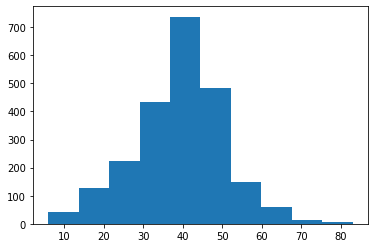

In [58]:
plt.hist(lengths, 10)
plt.show()

The mean length of the chunk is above 50 for the noun-verb set but below 50 for the noun-only set. This might mean that the noun-only modeling for the segments may not work well. Might have to use the noun-verb set.

## Saving work

In [59]:
with open("20240405_PhD_LtrChkLem-N.txt", "wb") as fp:   #Pickling
    pickle.dump(data_lemmatizedNouns, fp)

with open("20240405_PhD_LtrChkLem-V.txt", "wb") as fp:   #Pickling
    pickle.dump(data_lemmatizedVerbs, fp)

with open("20240405_PhD_LtrChkLem-NV.txt", "wb") as fp:   #Pickling
    pickle.dump(data_lemmatized, fp)